In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback


from verta import Client
import copy

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
path_Third_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Third_Sticker'

# Importing Modes for Third Sticker

- IQ data are raw time series directly exported from SignalVU

In [6]:
Third_Sticker_BackgroundRFactivities = pd.read_csv(path_Third_sticker+'/BackgroundRFactivities.csv')
Third_Sticker_Connected = pd.read_csv(path_Third_sticker+'/Connected.csv')
Third_Sticker_Searching = pd.read_csv(path_Third_sticker+'/Searching.csv')
Third_Sticker_Searching_without_connected = pd.read_csv(path_Third_sticker+'/Searching_without_connecting_to_app.csv')

### Example of  how one mode of I Q Samples looks like [ Connected ]


In [7]:
Third_Sticker_Connected

,Version,0.3
0,0.000074,-0.000016
1,0.000005,0.000008
2,-0.000020,0.000018
3,0.000015,-0.000015
4,0.000049,0.000029
...,...,...
3386995,-0.000550,-0.004099
3386996,-0.000306,-0.003436
3386997,-0.000140,-0.002825
3386998,-0.000218,-0.002791


In [8]:
# Renaming the Title of each coloum 

Third_Sticker_BackgroundRFactivities=Third_Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Third_Sticker_Connected=Third_Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Third_Sticker_Searching=Third_Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Third_Sticker_Searching_without_connected=Third_Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})


In [9]:
Third_Sticker_Connected

,I_Data,Q_Data
0,0.000074,-0.000016
1,0.000005,0.000008
2,-0.000020,0.000018
3,0.000015,-0.000015
4,0.000049,0.000029
...,...,...
3386995,-0.000550,-0.004099
3386996,-0.000306,-0.003436
3386997,-0.000140,-0.002825
3386998,-0.000218,-0.002791


In [10]:
# converting Pandas to Numpy for easier plotting
Third_Sticker_BackgroundRFactivities_numpy = Third_Sticker_BackgroundRFactivities.to_numpy()
Third_Sticker_Connected_numpy = Third_Sticker_Connected.to_numpy()
Third_Sticker_Searching_numpy = Third_Sticker_Searching.to_numpy()
Third_Sticker_Searching_without_connected_numpy = Third_Sticker_Searching_without_connected.to_numpy()

## FFT BackGround RF Activities [ Third Sticker ]

- Without Absolute Intensity Background RF activities

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


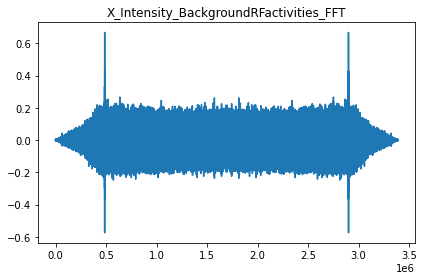

In [11]:
# Index 0 : I Data
# Index 1 : Q Data 

I_Data_Third_BackgroundRFactivities_FFT = Third_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_Third_BackgroundRFactivities_FFT = Third_Sticker_BackgroundRFactivities_numpy[0:,1]


X_Intensity_BackgroundRFactivities_FFT = np.fft.fftshift(fft(I_Data_Third_BackgroundRFactivities_FFT[:]-np.mean(I_Data_Third_BackgroundRFactivities_FFT[:])))
plt.plot(X_Intensity_BackgroundRFactivities_FFT)
plt.title("X_Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

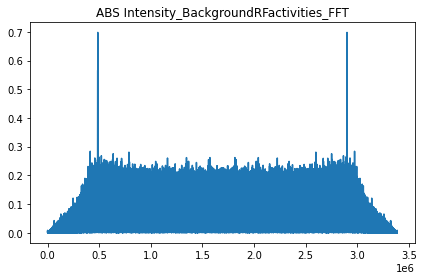

In [12]:
X_Intensity_BackgroundRFactivities_FFT_ABS = abs(np.fft.fftshift(fft(I_Data_Third_BackgroundRFactivities_FFT[:]-np.mean(I_Data_Third_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Intensity_BackgroundRFactivities_FFT_ABS)
plt.title("ABS Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

- Without Absolute Quadrature Background RF activities

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


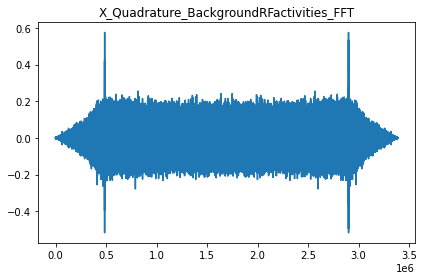

In [13]:
X_Quadrature_BackgroundRFactivities_FFT = np.fft.fftshift(fft(Q_Data_Third_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_Third_BackgroundRFactivities_FFT[:])))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT)
plt.title("X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

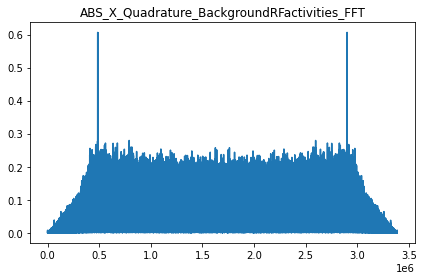

In [14]:
X_Quadrature_BackgroundRFactivities_FFT_ABS = abs(np.fft.fftshift(fft(Q_Data_Third_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_Third_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT_ABS)
plt.title("ABS_X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

# FFT Connected [ Third Sticker ]

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


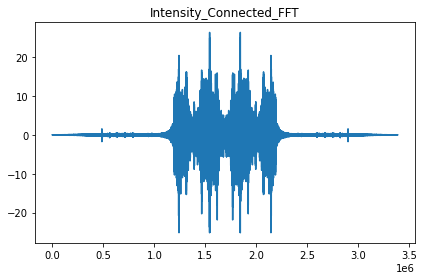

In [15]:
I_Data_Third_Connected_FFT = Third_Sticker_Connected_numpy[0:,0]
Q_Data_Third_Connected_FFT = Third_Sticker_Connected_numpy[0:,1]


X_Intensity_FFT_Connected = np.fft.fftshift(fft(I_Data_Third_Connected_FFT[:]-np.mean(I_Data_Third_Connected_FFT[:])))
plt.plot(X_Intensity_FFT_Connected )
plt.title("Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

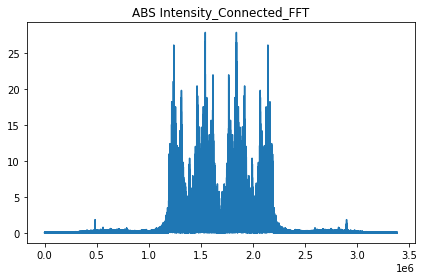

In [16]:
I_Data_Third_Connected_FFT = Third_Sticker_Connected_numpy[0:,0]
Q_Data_Third_Connected_FFT = Third_Sticker_Connected_numpy[0:,1]


X_Intensity_FFT_Connected_ABS = abs(np.fft.fftshift(fft(I_Data_Third_Connected_FFT[:]-np.mean(I_Data_Third_Connected_FFT[:]))))
plt.plot(X_Intensity_FFT_Connected_ABS )
plt.title("ABS Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


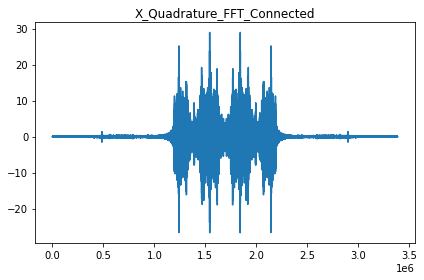

In [17]:
X_Quadrature_FFT_Connected = np.fft.fftshift(fft(Q_Data_Third_Connected_FFT[:]-np.mean(Q_Data_Third_Connected_FFT[:])))
plt.plot(X_Quadrature_FFT_Connected )
plt.title("X_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

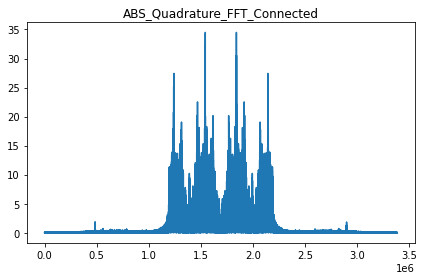

In [18]:
X_Quadrature_FFT_Connected_ABS = abs(np.fft.fftshift(fft(Q_Data_Third_Connected_FFT[:]-np.mean(Q_Data_Third_Connected_FFT[:]))))
plt.plot(X_Quadrature_FFT_Connected_ABS )
plt.title("ABS_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

# FFT Searching [ Third sticker ]

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


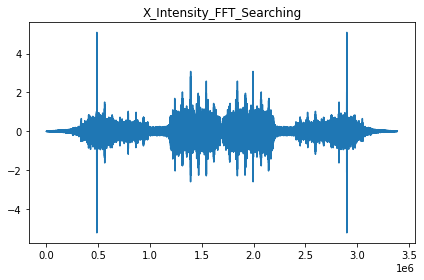

In [19]:
I_Data_Third_Searching_FFT = Third_Sticker_Searching_numpy[0:,0]
Q_Data_Third_Searching_FFT = Third_Sticker_Searching_numpy[0:,1]


X_Intensity_FFT_Searching = np.fft.fftshift(fft(I_Data_Third_Searching_FFT[:]-np.mean(I_Data_Third_Searching_FFT[:])))
plt.plot(X_Intensity_FFT_Searching )
plt.title("X_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

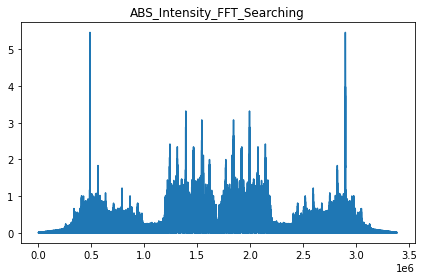

In [20]:

X_Intensity_FFT_Searching_ABS = abs(np.fft.fftshift(fft(I_Data_Third_Searching_FFT[:]-np.mean(I_Data_Third_Searching_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_ABS )
plt.title("ABS_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


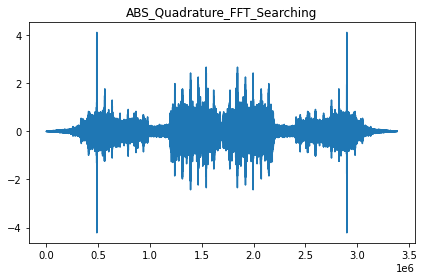

In [21]:
X_Quadrature_FFT_Searching = np.fft.fftshift(fft(Q_Data_Third_Searching_FFT[:]-np.mean(Q_Data_Third_Searching_FFT[:])))
plt.plot(X_Quadrature_FFT_Searching)
plt.title("ABS_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

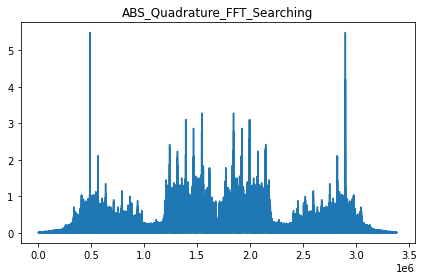

In [22]:
X_Quadrature_FFT_Searching_ABS = abs(np.fft.fftshift(fft(Q_Data_Third_Searching_FFT[:]-np.mean(Q_Data_Third_Searching_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_ABS )
plt.title("ABS_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

# Searching with WIFI established [ Third Sticker ] 

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


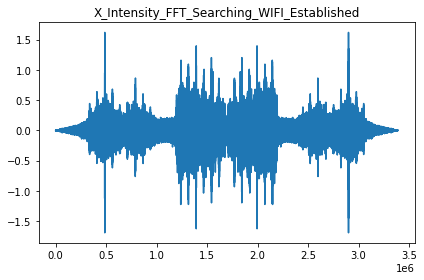

In [23]:
I_Data_Third_Searching_WIFI_established_FFT = Third_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Third_Searching_WIFI_established_FFT = Third_Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established = np.fft.fftshift(fft(I_Data_Third_Searching_WIFI_established_FFT[:]-np.mean(I_Data_Third_Searching_WIFI_established_FFT[:])))
plt.plot(X_Intensity_FFT_Searching_WIFI_established )
plt.title("X_Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

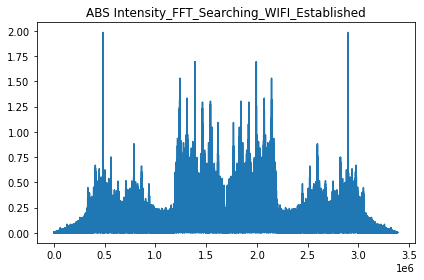

In [24]:
I_Data_Third_Searching_WIFI_established_FFT = Third_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Third_Searching_WIFI_established_FFT = Third_Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established_ABS = abs(np.fft.fftshift(fft(I_Data_Third_Searching_WIFI_established_FFT[:]-np.mean(I_Data_Third_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_WIFI_established_ABS )
plt.title("ABS Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


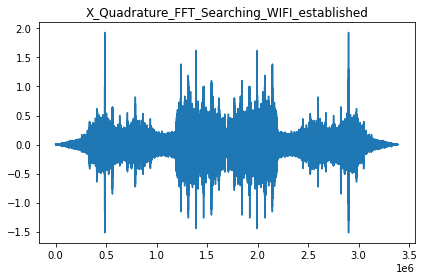

In [25]:
X_Quadrature_FFT_Searching_WIFI_established = np.fft.fftshift(fft(Q_Data_Third_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_Third_Searching_WIFI_established_FFT[:])))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established )
plt.title("X_Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

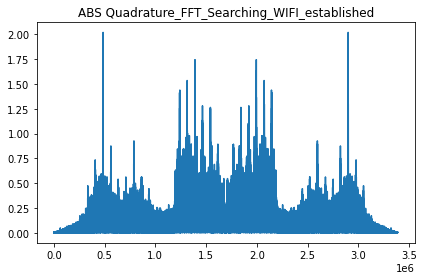

In [26]:
X_Quadrature_FFT_Searching_WIFI_established_ABS = abs(np.fft.fftshift(fft(Q_Data_Third_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_Third_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established_ABS )
plt.title("ABS Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

# Machine Learning

- Complex Number I+jQ 

In [27]:
I_Data_Third_Searching_WIFI_established_FFT

array([-3.2090e-05,  1.4410e-05,  1.8200e-05, ..., -3.6770e-05,
        1.0619e-04, -7.1140e-05])

In [28]:
Q_Data_Third_Searching_WIFI_established_FFT

array([ 3.783e-05,  2.708e-05, -3.110e-06, ..., -8.919e-05,  3.704e-05,
        1.386e-05])

In [29]:
complex_num_Searching_WIFI_Established = I_Data_Third_Searching_WIFI_established_FFT + 1j*Q_Data_Third_Searching_WIFI_established_FFT

In [30]:
complex_num_Searching_WIFI_Established

array([-3.2090e-05+3.783e-05j,  1.4410e-05+2.708e-05j,
        1.8200e-05-3.110e-06j, ..., -3.6770e-05-8.919e-05j,
        1.0619e-04+3.704e-05j, -7.1140e-05+1.386e-05j])

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


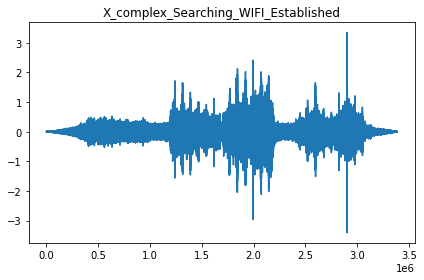

In [31]:
X_complex_Searching_WIFI_Established = (np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))
plt.plot(X_complex_Searching_WIFI_Established )
plt.title("X_complex_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

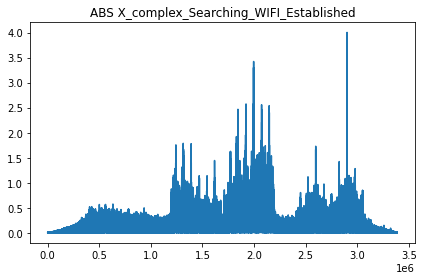

In [32]:
X_complex_Searching_WIFI_Established_ABS = abs(np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))
plt.plot(X_complex_Searching_WIFI_Established_ABS )
plt.title("ABS X_complex_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

# Complex Signal I&Q  Dataset

In [33]:
complex_num_Searching_WIFI_Established = I_Data_Third_Searching_WIFI_established_FFT + 1j*Q_Data_Third_Searching_WIFI_established_FFT
complex_num_Connected = I_Data_Third_Connected_FFT+1j*Q_Data_Third_Connected_FFT
complex_num_Background = I_Data_Third_BackgroundRFactivities_FFT+1j*Q_Data_Third_BackgroundRFactivities_FFT
complex_num_Searching = I_Data_Third_Searching_FFT+1j*Q_Data_Third_Searching_FFT

In [34]:
X_complex_Connected = abs(np.fft.fftshift(fft(complex_num_Connected[:]-np.mean(complex_num_Connected[:]))))
X_complex_Searching = abs(np.fft.fftshift(fft(complex_num_Searching[:]-np.mean(complex_num_Searching[:]))))
X_complex_Background = abs(np.fft.fftshift(fft(complex_num_Background[:]-np.mean(complex_num_Background[:]))))
X_complex_Searching_WIFI_Established = abs(np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))

In [35]:
print("Shape of one mode : "+ str(X_complex_Background.shape))

Shape of one mode : (3387000,)


# Reshaping


In [36]:
Size_of_Input_Feature = 120
size = X_complex_Background.shape[0]
Divided = int(size / Size_of_Input_Feature)


In [37]:
X_complex_Connected= X_complex_Connected.reshape(Divided,Size_of_Input_Feature)
X_complex_Searching= X_complex_Searching.reshape(Divided,Size_of_Input_Feature)
X_complex_Background= X_complex_Background.reshape(Divided,Size_of_Input_Feature)
X_complex_Searching_WIFI_Established= X_complex_Searching_WIFI_Established.reshape(Divided,Size_of_Input_Feature)

In [38]:
print("Shape of one mode after reshaping : "+ str(X_complex_Background.shape))

Shape of one mode after reshaping : (28225, 120)


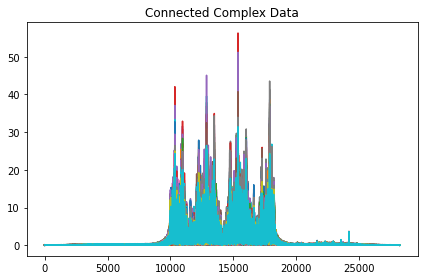

In [39]:
plt.plot(X_complex_Connected[0:])
plt.title("Connected Complex Data")
plt.tight_layout()
plt.show()

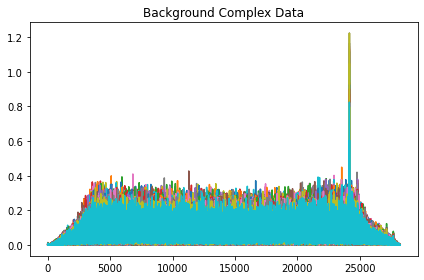

In [40]:
plt.plot(X_complex_Background[0:])
plt.title("Background Complex Data")
plt.tight_layout()
plt.show()

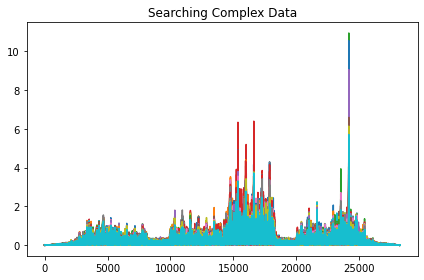

In [41]:
plt.plot(X_complex_Searching[0:])
plt.title("Searching Complex Data")
plt.tight_layout()
plt.show()

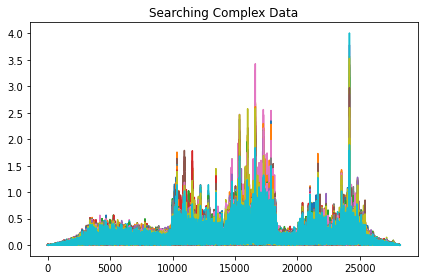

In [42]:
plt.plot(X_complex_Searching_WIFI_Established[0:])
plt.title("Searching Complex Data")
plt.tight_layout()
plt.show()

# Labelling

In [43]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [44]:
np.random.seed(2016)

Complex_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(X_complex_Background.shape[0],1))
Complex_BackgroundRFactivites_dataset=np.concatenate((X_complex_Background,Complex_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_BackgroundRFactivites_dataset.shape))

Complex_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(X_complex_Connected.shape[0],1))
Complex_connected_dataset=np.concatenate((X_complex_Connected,Complex_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_connected_dataset.shape))

Complex_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(X_complex_Searching.shape[0],1))
Complex_searching_dataset=np.concatenate((X_complex_Searching,Complex_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_searching_dataset.shape))

Complex_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(X_complex_Searching_WIFI_Established.shape[0],1))
Complex_searching_wifi_established_dataset=np.concatenate((X_complex_Searching_WIFI_Established,Complex_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_searching_wifi_established_dataset.shape))

print('\n')
print(Complex_BackgroundRFactivites_dataset[0:5])
print('\n')
print(Complex_connected_dataset[0:5])
print('\n')
print(Complex_searching_dataset[0:5])
print('\n')
print(Complex_searching_wifi_established_dataset[0:5])

Connected dataset shape : (28225, 124)
Connected dataset shape : (28225, 124)
Connected dataset shape : (28225, 124)
Connected dataset shape : (28225, 124)


[[1.56582869e-03 7.98962459e-04 2.68764705e-03 4.68214828e-03
  1.25452958e-03 9.48937099e-04 4.38987779e-03 3.51397335e-03
  3.01408501e-03 6.41297254e-04 2.08455554e-03 4.60975874e-03
  7.78751750e-04 1.86243809e-03 2.79119798e-03 2.70700252e-03
  7.32784535e-03 2.44043299e-03 2.55350301e-03 6.32615738e-04
  6.37912435e-03 2.79497609e-03 2.26275612e-03 3.70843805e-03
  3.68804753e-03 3.84179203e-04 4.20644533e-03 3.84515289e-03
  2.66732808e-03 8.10907889e-04 4.39987250e-03 7.95972068e-03
  2.70794806e-03 1.51833659e-03 7.98326993e-04 4.48729795e-03
  1.05584371e-03 5.06862711e-03 2.37579008e-03 1.23040687e-03
  6.62526269e-03 1.82267748e-03 3.16166314e-03 3.15074086e-03
  2.02343045e-03 3.86036033e-03 3.48575685e-03 4.40957511e-03
  2.78339052e-03 2.63327592e-03 9.77106280e-04 3.26478113e-03
  4.08120529e-03 3.52234913e-03 1.10

In [45]:
import copy
stacked_data=np.vstack((Complex_BackgroundRFactivites_dataset,Complex_connected_dataset,Complex_searching_dataset,Complex_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)


In [46]:
length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #2800
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #800 #3600
print(length_of_X_validation)

101610


In [47]:
Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:Size_of_Input_Feature]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,Size_of_Input_Feature:]
print(Y_Train_Dataset)

(79030, 120)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [48]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:Size_of_Input_Feature]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,Size_of_Input_Feature:]
print(Validation_Dataset.shape)

(22580, 120)


In [49]:
#Train_Dataset=Train_Dataset.reshape(length_of_X_train,Size_of_Input_Feature,1)
#Validation_Dataset=Validation_Dataset.reshape(800,Size_of_Input_Feature,1)
#print(Validation_Dataset.shape)

In [50]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)

model = Sequential()
model.add(Dense(128, input_dim=120, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


In [52]:
history = model.fit(Train_Dataset, Y_Train_Dataset, epochs=4000,validation_data=(Validation_Dataset, Y_Validation_Dataset), batch_size=100,
                     callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

Epoch 1/4000
791/791 [==============================] - 1s 944us/step - loss: 1.0936 - accuracy: 0.4866 - val_loss: 1.0328 - val_accuracy: 0.5254
Epoch 2/4000
791/791 [==============================] - 1s 792us/step - loss: 1.0053 - accuracy: 0.5420 - val_loss: 1.0009 - val_accuracy: 0.5433
Epoch 3/4000
791/791 [==============================] - 1s 836us/step - loss: 0.9762 - accuracy: 0.5572 - val_loss: 1.0158 - val_accuracy: 0.5381
Epoch 4/4000
791/791 [==============================] - 1s 845us/step - loss: 0.9641 - accuracy: 0.5649 - val_loss: 1.0041 - val_accuracy: 0.5341
Epoch 5/4000
791/791 [==============================] - 1s 841us/step - loss: 0.9543 - accuracy: 0.5696 - val_loss: 0.9699 - val_accuracy: 0.5651
Epoch 6/4000
791/791 [==============================] - 1s 827us/step - loss: 0.9450 - accuracy: 0.5766 - val_loss: 0.9749 - val_accuracy: 0.5538
Epoch 7/4000
791/791 [==============================] - 1s 803us/step - loss: 0.9353 - accuracy: 0.5816 - val_loss: 0.9602 -

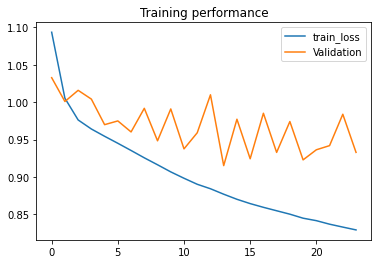

In [53]:
plt.figure()
plt.title('Training performance')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [55]:
_, accuracy_validation = model.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))



706/706 [==============================] - 0s 458us/step - loss: 0.9328 - accuracy: 0.5927
Accuracy_validation: 59.27


In [56]:
model.save("{Model FFT} Third sticker Trained")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {Model FFT} Third sticker Trained/assets


# Using Fifth Model as Trained Model 

In [57]:
from tensorflow import keras
load_Fifth_sticker_model = keras.models.load_model("../../Testing on RF spectrum/{Model FFT} Fifth sticker Trained")
_,accuracy=load_Fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

706/706 [==============================] - 0s 421us/step - loss: 1.2254 - accuracy: 0.4717
47.17448949813843


# Using Fourth Model as Trained Model


In [58]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("../../Testing on RF spectrum/{Model FFT} Fourth sticker Trained")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

706/706 [==============================] - 0s 508us/step - loss: 1.3346 - accuracy: 0.4582
45.81930935382843


# Using First Model as Trained Model 

In [59]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("../../Testing on RF spectrum/{Model FFT} First sticker Trained")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

706/706 [==============================] - 0s 458us/step - loss: 45.4823 - accuracy: 0.3135
31.34632408618927


# Using Third Model as Trained Model [ Validation own ]

In [60]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("../../Testing on RF spectrum/{Model FFT} Third sticker Trained")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

706/706 [==============================] - 0s 452us/step - loss: 0.9692 - accuracy: 0.5922
59.22497510910034
